In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import shap

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
def Drop_same_data(dataframe):
    x0_same = dataframe[dataframe.duplicated(subset=['x0'], keep=False)]
    x0_same_group = x0_same.groupby('x0').aggregate('mean')
    x0_same_group = x0_same_group.reset_index()
    x0_same_drop = dataframe.drop_duplicates(['x0'], keep=False)
    x0_same_drop_mean = x0_same_drop.append(x0_same_group)
    x0_same_drop_mean = x0_same_drop_mean.sort_values('x0').reset_index(drop=True)
    return x0_same_drop_mean

In [3]:
def change_state(dataframe):
    df = dataframe.copy()
    df.replace('normal', 0, inplace=True)
    df.replace('abnormal', 1, inplace=True)
    return df

In [4]:
motor2 = pd.read_csv("C:/Users/creade/data_science/현대중공업_DT/DT/renewal_code/data/motor2.csv")
motor2.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26
0,2019-09-30 23:30:00,1.306385,1.129303,0.315782,-0.991891,-1.118571,0.785998,0.929383,1.389944,0.078944,...,1.297861,1.325133,1.301901,1.207628,1.236300,3,1.076502,0.909413,-0.417839,normal
1,2019-09-30 23:30:01,1.306385,1.129303,0.315782,-0.991891,-1.118571,0.785998,0.929383,1.389944,0.078944,...,1.297861,1.325133,1.301901,1.204801,1.239041,3,1.076502,0.909413,-0.417839,normal
2,2019-09-30 23:30:02,1.306385,1.129303,0.315782,-0.991891,-1.118571,0.785998,0.929383,1.389944,0.078944,...,1.297861,1.325133,1.301901,1.204801,1.239041,3,1.076502,0.909413,-0.417839,normal
3,2019-09-30 23:30:03,1.306385,1.129303,0.315782,-0.991891,-1.118571,0.785998,0.929383,1.389944,0.078944,...,1.297861,1.325133,1.301901,1.204801,1.239041,3,1.076502,0.909413,-0.417839,normal
4,2019-09-30 23:30:04,1.312998,1.129303,0.315782,-0.991891,-1.118571,0.785998,0.929383,1.389944,0.078944,...,1.297861,1.325133,1.301901,1.204801,1.239041,3,1.076502,0.909413,-0.417839,normal


## 전처리

In [5]:
motor2 = change_state(motor2)
motor2 = Drop_same_data(motor2)
motor2 = motor2.round(2)

In [6]:
motor2.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26
0,2019-08-31 23:30:00,-0.81,-0.91,-0.87,-0.44,0.82,-1.14,-1.07,-0.72,-0.76,...,-0.81,-0.81,-0.8,-0.83,-0.83,2.0,-1.05,-1.09,-0.42,1.0
1,2019-08-31 23:30:01,-0.81,-0.91,-0.87,-0.44,0.82,-1.14,-1.07,-0.72,-0.76,...,-0.81,-0.81,-0.8,-0.83,-0.83,2.0,-1.05,-1.09,-0.42,1.0
2,2019-08-31 23:30:02,-0.81,-0.91,-0.87,-0.44,0.82,-1.14,-1.07,-0.72,-0.76,...,-0.81,-0.81,-0.8,-0.83,-0.83,2.0,-1.05,-1.09,-0.42,1.0
3,2019-08-31 23:30:03,-0.81,-0.91,-0.87,-0.44,0.82,-1.14,-1.07,-0.72,-0.76,...,-0.81,-0.81,-0.8,-0.83,-0.83,2.0,-1.04,-1.09,-0.42,1.0
4,2019-08-31 23:30:04,-0.81,-0.91,-0.87,-0.44,0.82,-1.14,-1.07,-0.72,-0.76,...,-0.81,-0.81,-0.8,-0.83,-0.83,2.0,-1.04,-1.09,-0.42,1.0


## PCA

- System 2 - 1 : x11, x13
- System 2 - 2 : x6, x7, x23
- System 3 - 1 : x1, x11, x12, x19
- System 3 - 2 : x3, x6

### System 2 - 1

In [7]:
System2_1_col = ['x11', 'x13']
System2_1_pca_df = motor2[System2_1_col]

System2_1_pca = PCA(n_components=1)
System2_1_pca.fit(System2_1_pca_df)
System2_1_pca_result = System2_1_pca.transform(System2_1_pca_df)

# 차원 축소 결과
print('차원 축소 결과 평가', System2_1_pca.explained_variance_ratio_)

# DataFrame으로 변환
System2_1_pca_result_df = pd.DataFrame(System2_1_pca_result, columns=['System2_1 PCA'])
System2_1_pca_result_df

차원 축소 결과 평가 [0.99559131]


,System2_1 PCA
0,-1.182250
1,-1.182250
2,-1.182250
3,-1.182250
4,-1.182250
...,...
4320572,-1.090217
4320573,-1.090217
4320574,-1.090217
4320575,-1.090217


## System 2-2

In [8]:
System2_2_col = ['x1', 'x11', "x23"]
System2_2_pca_df = motor2[System2_2_col]

System2_2_pca = PCA(n_components=1)
System2_2_pca.fit(System2_2_pca_df)
System2_2_pca_result = System2_2_pca.transform(System2_2_pca_df)

# 차원 축소 결과
print('차원 축소 결과 평가', System2_2_pca.explained_variance_ratio_)

# DataFrame으로 변환
System2_2_pca_result_df = pd.DataFrame(System2_2_pca_result, columns=['System2_2 PCA'])
System2_2_pca_result_df

차원 축소 결과 평가 [0.92974586]


,System2_2 PCA
0,-1.536911
1,-1.536911
2,-1.536911
3,-1.531365
4,-1.531365
...,...
4320572,-0.738343
4320573,-0.732798
4320574,-0.732798
4320575,-0.732798


### System 3-1

In [9]:
System3_1_col = ['x6', 'x7', "x12", "x19"]
System3_1_pca_df = motor2[System3_1_col]

System3_1_pca = PCA(n_components=1)
System3_1_pca.fit(System3_1_pca_df)
System3_1_pca_result = System3_1_pca.transform(System3_1_pca_df)

# 차원 축소 결과
print('차원 축소 결과 평가', System3_1_pca.explained_variance_ratio_)

# DataFrame으로 변환
System3_1_pca_result_df = pd.DataFrame(System3_1_pca_result, columns=['System3_1 PCA'])
System3_1_pca_result_df

차원 축소 결과 평가 [0.92020439]


,System3_1 PCA
0,-1.913168
1,-1.913168
2,-1.913168
3,-1.913168
4,-1.913168
...,...
4320572,-0.418421
4320573,-0.418421
4320574,-0.418421
4320575,-0.418421


### System 3-2

In [10]:
System3_2_col = ['x3', 'x6']
System3_2_pca_df = motor2[System3_2_col]

System3_2_pca = PCA(n_components=1)
System3_2_pca.fit(System3_2_pca_df)
System3_2_pca_result = System3_2_pca.transform(System3_2_pca_df)

# 차원 축소 결과
print('차원 축소 결과 평가', System3_2_pca.explained_variance_ratio_)

# DataFrame으로 변환
System3_2_pca_result_df = pd.DataFrame(System3_2_pca_result, columns=['System3_2 PCA'])
System3_2_pca_result_df

차원 축소 결과 평가 [0.85962336]


,System3_2 PCA
0,1.422883
1,1.422883
2,1.422883
3,1.422883
4,1.422883
...,...
4320572,-1.630776
4320573,-1.729616
4320574,-1.729616
4320575,-1.729616


## 최종 데이터 정리

In [11]:
df = motor2[["x4", "x8", "x9", "x10", "x12", "x13", "x15", "x21", "x24"]]
df['System2_1 PCA'] = System2_1_pca_result_df['System2_1 PCA']
df['System2_2 PCA'] = System2_2_pca_result_df['System2_2 PCA']
df['System3_1 PCA'] = System3_1_pca_result_df['System3_1 PCA']
df['System3_2 PCA'] = System3_2_pca_result_df['System3_2 PCA']
df['x26'] = motor2['x26']
df

,x4,x8,x9,x10,x12,x13,x15,x21,x24,System2_1 PCA,System2_2 PCA,System3_1 PCA,System3_2 PCA,x26
0,-0.44,-0.72,-0.76,-1.07,-0.82,-0.86,-1.03,-0.83,-1.09,-1.182250,-1.536911,-1.913168,1.422883,1.0
1,-0.44,-0.72,-0.76,-0.92,-0.82,-0.86,-1.03,-0.83,-1.09,-1.182250,-1.536911,-1.913168,1.422883,1.0
2,-0.44,-0.72,-0.76,-0.92,-0.82,-0.86,-1.03,-0.83,-1.09,-1.182250,-1.536911,-1.913168,1.422883,1.0
3,-0.44,-0.72,-0.76,-1.07,-0.82,-0.86,-1.03,-0.83,-1.09,-1.182250,-1.531365,-1.913168,1.422883,1.0
4,-0.44,-0.72,-0.76,-1.07,-0.82,-0.86,-1.03,-0.83,-1.09,-1.182250,-1.531365,-1.913168,1.422883,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4320572,2.66,-0.72,1.90,1.41,-0.82,-0.73,0.36,-0.83,-0.77,-1.090217,-0.738343,-0.418421,-1.630776,0.0
4320573,2.66,-0.72,1.90,1.41,-0.82,-0.73,0.36,-0.83,-0.77,-1.090217,-0.732798,-0.418421,-1.729616,0.0
4320574,2.66,-0.72,1.90,1.41,-0.82,-0.73,0.36,-0.83,-0.77,-1.090217,-0.732798,-0.418421,-1.729616,0.0
4320575,2.66,-0.72,1.90,1.41,-0.82,-0.73,0.36,-0.83,-0.77,-1.090217,-0.732798,-0.418421,-1.729616,0.0


In [12]:
# 정상 되는 시점의 index 값
first_normal_idx = np.argmax(df['x26'] == 0)
first_normal_idx

1752998

In [13]:
System1_col = ['x4', 'x15', "x26"]
System2_col = ['x12', 'System2_1 PCA', "System2_1 PCA", "x26"]
System3_col = ['x13', 'x24', 'System3_1 PCA', "System3_2 PCA", "x26"]
System4_col = ['x8', 'x9', 'x10', "x21", "x26"]

System1_df = df[System1_col]
System2_df = df[System2_col]
System3_df = df[System3_col]
System4_df = df[System4_col]

## Problem 1

### System 1

In [14]:
System1_train_abnormal = System1_df[:1402397]
System1_train_normal = System1_df[2266513:]
System1_train = pd.concat([System1_train_abnormal, System1_train_normal]).reset_index(drop = True)
System1_train.head()

,x4,x15,x26
0,-0.44,-1.03,1.0
1,-0.44,-1.03,1.0
2,-0.44,-1.03,1.0
3,-0.44,-1.03,1.0
4,-0.44,-1.03,1.0


In [15]:
System1_train_x = System1_train.drop("x26", axis = 1)
System1_train_y = System1_train["x26"]

print(System1_train_x.shape, System1_train_y.shape)

(3456461, 2) (3456461,)


In [16]:
System1_test = System1_df[1402397:2266513].reset_index(drop = True)
System1_test.head()

,x4,x15,x26
0,3.44,0.51,1.0
1,3.44,0.51,1.0
2,3.44,0.51,1.0
3,3.44,0.51,1.0
4,3.44,0.51,1.0


In [17]:
System1_test_x = System1_test.drop('x26', axis=1)
System1_test_y = System1_test['x26']

print(System1_test_x.shape, System1_test_y.shape)

(864116, 2) (864116,)


In [18]:
System1_model = LogisticRegression(solver="lbfgs", C=10, tol=1e-4, max_iter=1000)                  
System1_model.fit(System1_train_x, System1_train_y)

LogisticRegression(C=10, max_iter=1000)

In [19]:
# 예측값
System1_pred = System1_model.predict(System1_test_x)

# 다른 평가지표
accuracy = System1_model.score(System1_test_x, System1_test_y)
precision = precision_score(System1_test_y, System1_pred)
recall = recall_score(System1_test_y, System1_pred)
f1 = f1_score(System1_test_y, System1_pred)
print("Accuracy(정확도):", accuracy.round(2))
print('Presicion(정밀도): ', precision.round(2))
print('Recall(재현율): ', recall.round(2))
print('F1_score: ', f1.round(2))

Accuracy(정확도): 0.68
Presicion(정밀도):  0.71
Recall(재현율):  0.38
F1_score:  0.49


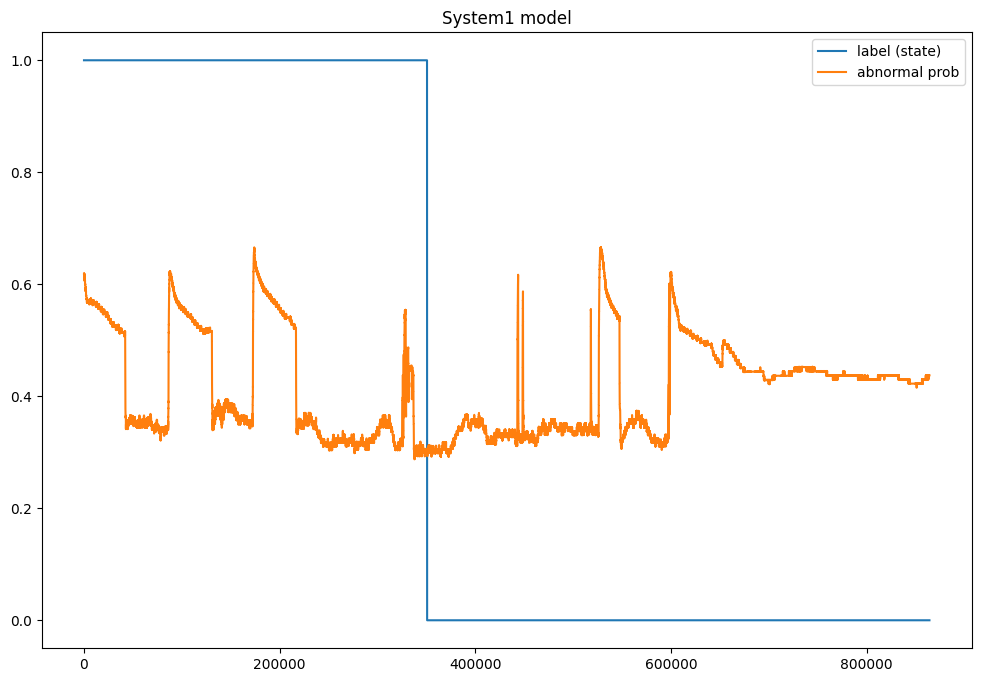

In [20]:
# 확률
System1_prob = System1_model.predict_proba(System1_test_x)

# 시각화
plt.figure(figsize=(12, 8))
plt.plot(System1_test_y, label='label (state)')
plt.plot(System1_prob[:,1], label='abnormal prob')
plt.legend()
plt.title('System1 model')
plt.show()

### System 2

In [21]:
System2_train_abnormal = System2_df[:1402397]
System2_train_normal = System2_df[2266513:]
System2_train = pd.concat([System2_train_abnormal, System2_train_normal]).reset_index(drop = True)
System2_train.head()

,x12,System2_1 PCA,System2_1 PCA,x26
0,-0.82,-1.18225,-1.18225,1.0
1,-0.82,-1.18225,-1.18225,1.0
2,-0.82,-1.18225,-1.18225,1.0
3,-0.82,-1.18225,-1.18225,1.0
4,-0.82,-1.18225,-1.18225,1.0


In [22]:
System2_train_x = System2_train.drop("x26", axis = 1)
System2_train_y = System2_train["x26"]

print(System2_train_x.shape, System2_train_y.shape)

(3456461, 3) (3456461,)


In [23]:
System2_test = System2_df[1402397:2266513].reset_index(drop = True)
System2_test.head()

,x12,System2_1 PCA,System2_1 PCA,x26
0,-0.82,-1.090217,-1.090217,1.0
1,-0.82,-1.090217,-1.090217,1.0
2,-0.82,-1.090217,-1.090217,1.0
3,-0.82,-1.090217,-1.090217,1.0
4,-0.82,-1.090217,-1.090217,1.0


In [24]:
System2_test_x = System2_test.drop('x26', axis=1)
System2_test_y = System2_test['x26']

print(System2_test_x.shape, System2_test_y.shape)

(864116, 3) (864116,)


In [25]:
System2_model = LogisticRegression(solver="lbfgs", C=10, tol=1e-4, max_iter=1000)                  
System2_model.fit(System2_train_x, System2_train_y)

LogisticRegression(C=10, max_iter=1000)

In [26]:
# 예측값
System2_pred = System2_model.predict(System2_test_x)

# 다른 평가지표
accuracy = System2_model.score(System2_test_x, System2_test_y)
precision = precision_score(System2_test_y, System2_pred)
recall = recall_score(System2_test_y, System2_pred)
f1 = f1_score(System2_test_y, System2_pred)
print("Accuracy(정확도):", accuracy.round(2))
print('Presicion(정밀도): ', precision.round(2))
print('Recall(재현율): ', recall.round(2))
print('F1_score: ', f1.round(2))

Accuracy(정확도): 0.58
Presicion(정밀도):  0.17
Recall(재현율):  0.01
F1_score:  0.02


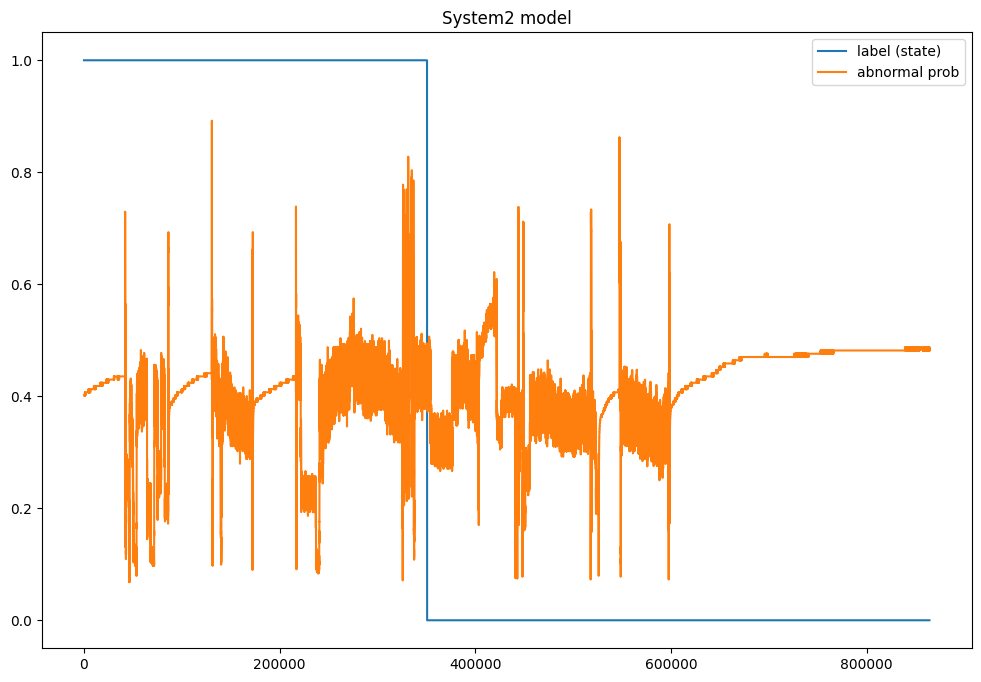

In [27]:
# 확률
System2_prob = System2_model.predict_proba(System2_test_x)

# 시각화
plt.figure(figsize=(12, 8))
plt.plot(System2_test_y, label='label (state)')
plt.plot(System2_prob[:,1], label='abnormal prob')
plt.legend()
plt.title('System2 model')
plt.show()

### System 3

In [28]:
System3_train_abnormal = System3_df[:1402397]
System3_train_normal = System3_df[2266513:]
System3_train = pd.concat([System3_train_abnormal, System3_train_normal]).reset_index(drop = True)
System3_train.head()

,x13,x24,System3_1 PCA,System3_2 PCA,x26
0,-0.86,-1.09,-1.913168,1.422883,1.0
1,-0.86,-1.09,-1.913168,1.422883,1.0
2,-0.86,-1.09,-1.913168,1.422883,1.0
3,-0.86,-1.09,-1.913168,1.422883,1.0
4,-0.86,-1.09,-1.913168,1.422883,1.0


In [29]:
System3_train_x = System3_train.drop("x26", axis = 1)
System3_train_y = System3_train["x26"]

print(System3_train_x.shape, System3_train_y.shape)

(3456461, 4) (3456461,)


In [30]:
System3_test = System3_df[1402397:2266513].reset_index(drop = True)
System3_test.head()

,x13,x24,System3_1 PCA,System3_2 PCA,x26
0,-0.73,-0.74,-0.422557,-1.496503,1.0
1,-0.73,-0.74,-0.422557,-1.496503,1.0
2,-0.73,-0.74,-0.422557,-1.496503,1.0
3,-0.73,-0.74,-0.422557,-1.496503,1.0
4,-0.73,-0.74,-0.422557,-1.496503,1.0


In [31]:
System3_test_x = System3_test.drop('x26', axis=1)
System3_test_y = System3_test['x26']

print(System3_test_x.shape, System3_test_y.shape)

(864116, 4) (864116,)


In [32]:
System3_model = LogisticRegression(solver="lbfgs", C=10, tol=1e-4, max_iter=1000)                  
System3_model.fit(System3_train_x, System3_train_y)

LogisticRegression(C=10, max_iter=1000)

In [33]:
# 예측값
System3_pred = System3_model.predict(System3_test_x)

# 다른 평가지표
accuracy = System3_model.score(System3_test_x, System3_test_y)
precision = precision_score(System3_test_y, System3_pred)
recall = recall_score(System3_test_y, System3_pred)
f1 = f1_score(System3_test_y, System3_pred)
print("Accuracy(정확도):", accuracy.round(2))
print('Presicion(정밀도): ', precision.round(2))
print('Recall(재현율): ', recall.round(2))
print('F1_score: ', f1.round(2))

Accuracy(정확도): 0.74
Presicion(정밀도):  0.96
Recall(재현율):  0.37
F1_score:  0.54


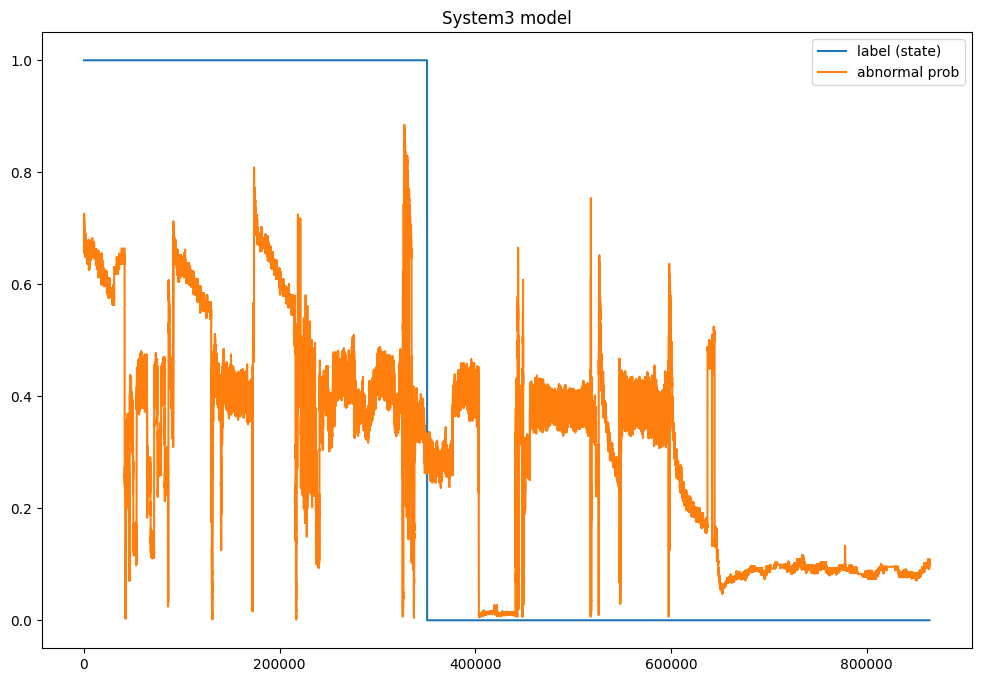

In [34]:
# 확률
System3_prob = System3_model.predict_proba(System3_test_x)

# 시각화
plt.figure(figsize=(12, 8))
plt.plot(System3_test_y, label='label (state)')
plt.plot(System3_prob[:,1], label='abnormal prob')
plt.legend()
plt.title('System3 model')
plt.show()

### System 4

In [35]:
System4_train_abnormal = System4_df[:1402397]
System4_train_normal = System4_df[2266513:]
System4_train = pd.concat([System4_train_abnormal, System4_train_normal]).reset_index(drop = True)
System4_train.head()

,x8,x9,x10,x21,x26
0,-0.72,-0.76,-1.07,-0.83,1.0
1,-0.72,-0.76,-0.92,-0.83,1.0
2,-0.72,-0.76,-0.92,-0.83,1.0
3,-0.72,-0.76,-1.07,-0.83,1.0
4,-0.72,-0.76,-1.07,-0.83,1.0


In [36]:
System4_train_x = System4_train.drop("x26", axis = 1)
System4_train_y = System4_train["x26"]

print(System4_train_x.shape, System4_train_y.shape)

(3456461, 4) (3456461,)


In [37]:
System4_test = System4_df[1402397:2266513].reset_index(drop = True)
System4_test.head()

,x8,x9,x10,x21,x26
0,-0.72,2.18,1.26,-0.83,1.0
1,-0.72,2.18,1.26,-0.83,1.0
2,-0.72,2.18,1.26,-0.83,1.0
3,-0.72,2.18,1.26,-0.83,1.0
4,-0.72,2.18,1.26,-0.83,1.0


In [38]:
System4_test_x = System4_test.drop('x26', axis=1)
System4_test_y = System4_test['x26']

print(System4_test_x.shape, System4_test_y.shape)

(864116, 4) (864116,)


In [39]:
System4_model = LogisticRegression(solver="lbfgs", C=10, tol=1e-4, max_iter=1000)                  
System4_model.fit(System4_train_x, System4_train_y)

LogisticRegression(C=10, max_iter=1000)

In [40]:
# 예측값
System4_pred = System4_model.predict(System4_test_x)

# 다른 평가지표
accuracy = System4_model.score(System4_test_x, System4_test_y)
precision = precision_score(System4_test_y, System4_pred)
recall = recall_score(System4_test_y, System4_pred)
f1 = f1_score(System4_test_y, System4_pred)
print("Accuracy(정확도):", accuracy.round(2))
print('Presicion(정밀도): ', precision.round(2))
print('Recall(재현율): ', recall.round(2))
print('F1_score: ', f1.round(2))

Accuracy(정확도): 0.58
Presicion(정밀도):  0.49
Recall(재현율):  0.6
F1_score:  0.54


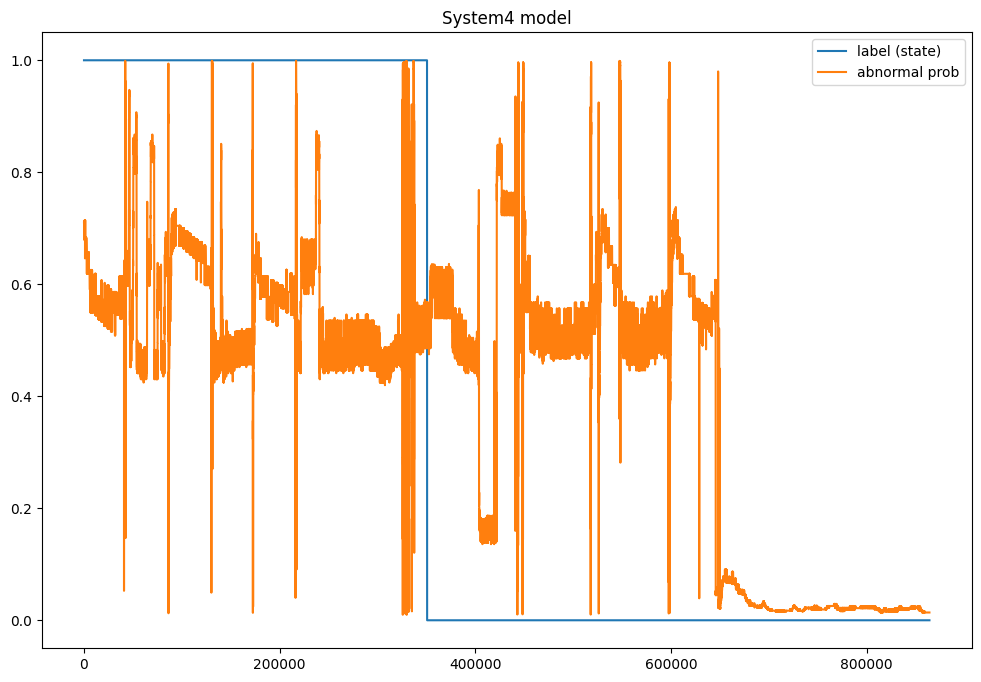

In [41]:
# 확률
System4_prob = System4_model.predict_proba(System4_test_x)

# 시각화
plt.figure(figsize=(12, 8))
plt.plot(System4_test_y, label='label (state)')
plt.plot(System4_prob[:,1], label='abnormal prob')
plt.legend()
plt.title('System4 model')
plt.show()

## Problem 2

In [42]:
engine_df = pd.DataFrame({'System1 prob': System1_prob[:,1],
                          'System2 prob': System2_prob[:,1],
                          'System3 prob': System3_prob[:,1],
                          'System4 prob': System4_prob[:,1],
                          'state': System4_test_y}) # test dataset의 label 가져옴 (모든 모델의 label동일하니 아무거나)
engine_df.head()

,System1 prob,System2 prob,System3 prob,System4 prob,state
0,0.618676,0.40149,0.6981,0.710466,1.0
1,0.618676,0.40149,0.6981,0.710466,1.0
2,0.618676,0.40149,0.6981,0.710466,1.0
3,0.618676,0.40149,0.6981,0.710466,1.0
4,0.618676,0.40149,0.6981,0.710466,1.0


### Train & Test

In [43]:
# trian & test 나누기
x = engine_df.drop('state', axis=1)
y = engine_df['state']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)
print("train -", x_train.shape, y_train.shape)
print("test -", x_test.shape, y_test.shape)

train - (691292, 4) (691292,)
test - (172824, 4) (172824,)


### Logistic Regression

In [44]:
# 모델 선언 및 훈련
engine_model = LogisticRegression(solver="lbfgs", C=10, tol=1e-4, max_iter=1000)

# 훈련                               
engine_model.fit(x_train, y_train)

LogisticRegression(C=10, max_iter=1000)

In [45]:
# 예측값
engine_pred = engine_model.predict(x_test)

# 다른 평가지표
precision = precision_score(y_test, engine_pred)
recall = recall_score(y_test, engine_pred)
f1 = f1_score(y_test, engine_pred)
accuracy = engine_model.score(x_test, y_test)
print("Accuracy(정확도):", accuracy.round(2))
print('Presicion(정밀도): ', precision.round(2))
print('Recall(재현율): ', recall.round(2))
print('F1_score: ', f1.round(2))

Accuracy(정확도): 0.74
Presicion(정밀도):  0.66
Recall(재현율):  0.74
F1_score:  0.69


### SHAP

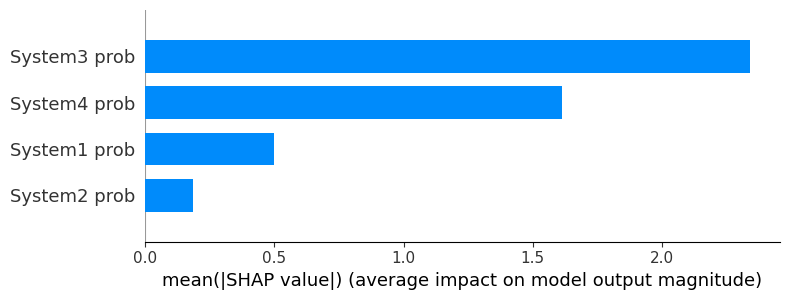

In [46]:
explainer = shap.Explainer(engine_model, x_train, feature_names=x_train.columns)
shap_values = explainer(x_test)
shap.summary_plot(shap_values, x_train, plot_type='bar')